[0.7034674224983917] 

1.901801259513314


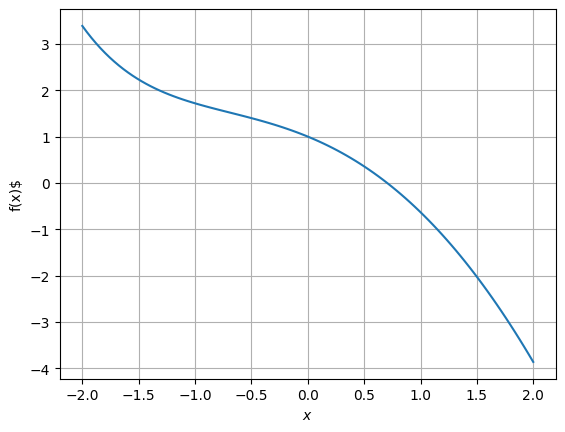

In [20]:
#4.1.1
import scipy
import numpy as np
import matplotlib.pyplot as plt

omega = []
def func(x):
    return np.exp(-x) - x ** 2
xx = np.linspace(-2, 2, 100)
s = scipy.optimize.root_scalar(func, bracket = [0.5, 1.0]).root
omega.append(s)
print(omega, '\n')
fig, ax = plt.subplots()
ax.plot(xx, func(xx))
ax.grid()
ax.set_xlabel("$x$"), ax.set_ylabel("f(x)$")

def funcc(x):
    return -np.exp(-x) - 2*x

result = np.abs(funcc(s))
print(result)
    

[1.1655611852072114]
2.155421131677418


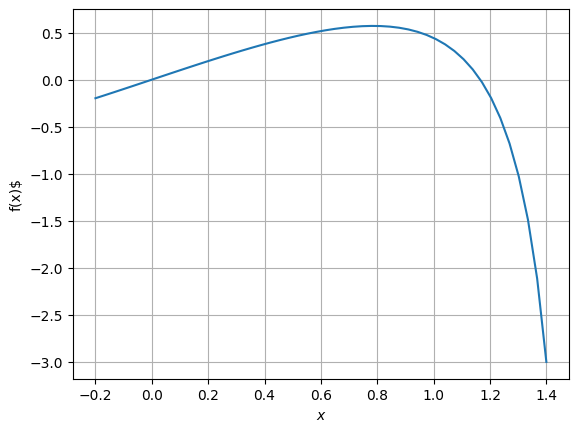

In [27]:
#4.1.2
import scipy
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return 2*x - np.tan(x)

omega = []
s = scipy.optimize.root_scalar(func, bracket = [1.0, 1.2]).root
omega.append(s)
print(omega)

xx = np.linspace(-0.2, 1.4)
fig, ax = plt.subplots()
ax.plot(xx, func(xx))
ax.grid()
ax.set_xlabel("$x$"), ax.set_ylabel("f(x)$")

def funcc(x):
    return 2 + np.cos(x)**2

result = np.abs(funcc(s))
print(result)

无零点


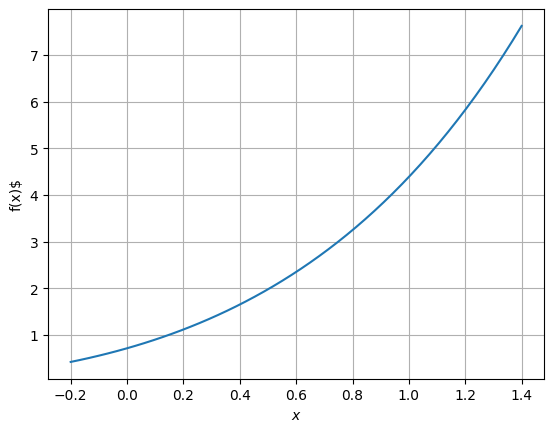

In [30]:
#4.1.3
import scipy
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return np.exp(x+1) - x - 2


xx = np.linspace(-0.2, 1.4)
fig, ax = plt.subplots()
ax.plot(xx, func(xx))
ax.grid()
ax.set_xlabel("$x$"), ax.set_ylabel("f(x)$")

try:
    omega = []
    s = scipy.optimize.root_scalar(func, bracket = [-2, 2]).root
    omega.append(s)
    print(omega)
    def funcc(x):
        return np.exp(x+1) - 1
    result = np.abs(funcc(s))
    print(result)
except:
    print('无零点')

[0.12351180704706448, 0.11814632045792234, 0.1132002015617075, 0.10860744853049042, 0.10431660619174275, 0.10028677047068411, 0.09648487886495097, 0.0928838197313211, 0.08946108005403103, 0.08619775736295335, 0.08307782401052892]


(Text(0.5, 0, '$r$'), Text(0, 0.5, '$f(x)$'))

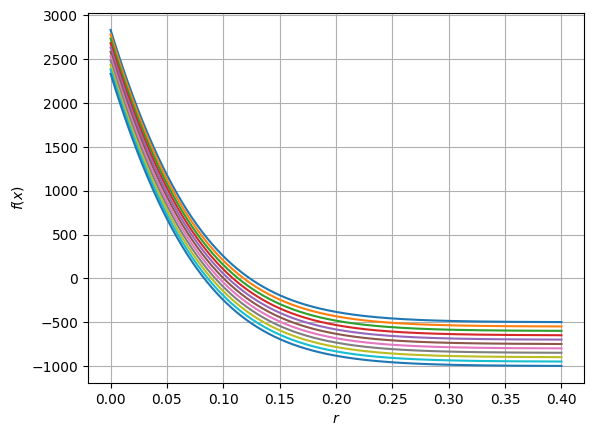

In [16]:
#4.1.4
import scipy
import numpy as np
import matplotlib.pyplot as plt

def func(r, P):
    return 250000*r / (3*((1+r/12)**300-1)) - P

p = np.array([500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000])

rr = np.linspace(0.000000001, 0.4, 1000)

omega = []
for P_val in p:
    s = scipy.optimize.root_scalar(lambda r:func(r, P_val), bracket = [0.08, 0.3]).root
    omega.append(s)
print(omega)

fig, ax = plt.subplots()
for P_val in p:
    ax.plot(rr, func(rr, P_val))
ax.grid()
ax.set_xlabel("$r$"), ax.set_ylabel("$f(x)$")



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

tau = 1.7610
epsilon = 0.2230

def kepler_equation(psi, t, tau, epsilon):
    return psi - epsilon * np.sin(psi) - 2 * np.pi * t / tau

def solve_kepler(t, tau, epsilon):
    
    # 初始猜测值 对于小偏心率，用M = 2πt/τ作为初始猜测
    M = 2 * np.pi * t / tau
    initial_guess = M

'''二分法'''
def bisection_method(t, tau, epsilon, tol=1e-10, max_iter=100):
    M = 2 * np.pi * t / tau
    a, b = 0, 2 * np.pi  # ψ的范围是[0, 2π]
    
    for i in range(max_iter):
        psi_mid = (a + b) / 2
        f_mid = kepler_equation(psi_mid, t, tau, epsilon)
        
        if abs(f_mid) < tol:
            return psi_mid
        
        f_a = kepler_equation(a, t, tau, epsilon)
        
        if f_a * f_mid < 0:
            b = psi_mid
        else:
            a = psi_mid
    
     return (a + b) / 2

# 使用牛顿方法求解
try:
        psi = newton(kepler_equation, initial_guess, args=(t, tau, epsilon), maxiter=100)
        return psi
    except:
        # 如果牛顿法失败，使用二分法
        return bisection_method(t, tau, epsilon)

def calculate_theta(psi, epsilon):
    """
    根据ψ计算θ: tan(θ/2) = √((1+ε)/(1-ε)) * tan(ψ/2)
    """
    # 使用公式计算theta
    term = np.sqrt((1 + epsilon) / (1 - epsilon)) * np.tan(psi / 2)
    theta = 2 * np.arctan(term)
    
    # 确保theta在[0, 2π)范围内
    theta = theta % (2 * np.pi)
    
    return theta

tt = np.linspace(0, tau, 100)



(Text(0.5, 0, '$x$'), Text(0, 0.5, 'lambertW(x)$'))

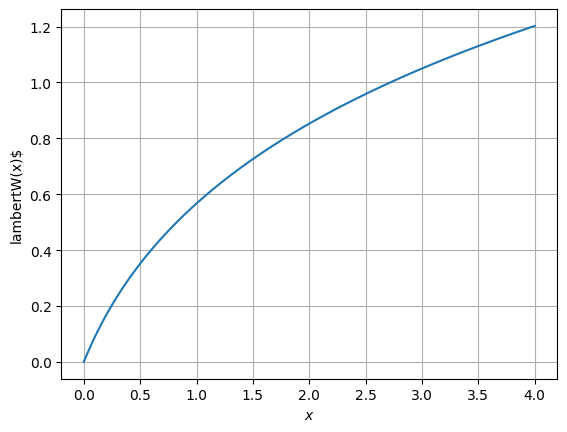

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

def lambertW(y):
    return scipy.special.lambertw(y)

yy = np.linspace(0, 4, 1000)
fig, ax = plt.subplots()
ax.plot(yy, lambertW(yy))
ax.grid()
ax.set_xlabel("$x$"), ax.set_ylabel("lambertW(x)$")

(Text(0.5, 0, '$x$'), Text(0, 0.5, 'lambertW(x)$'))

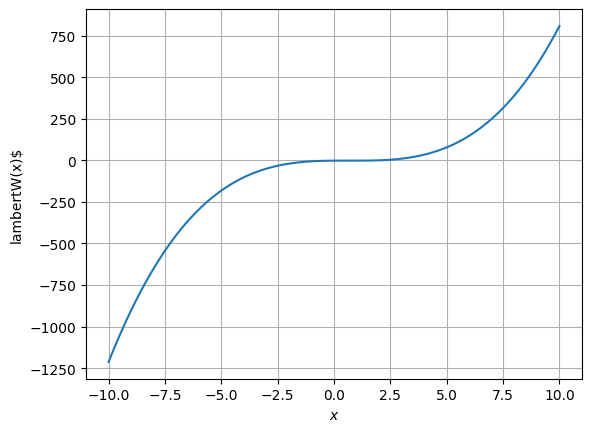